# Ideia do Projeto 1 (Slot 3) - Setor Imobiliário

Case: A LOFT,

Empresa do ramo imobiliário Brasileiro, quer expandir sua área de atuação e fazer um investimento internacional. 

Devido a questões estratégicas, a empresa irá investir em imóveis no Condado de County, nos Estatos Unidos. 

Utilizando o dataset disponibilizado, você irá aplicar os conceitos de CRISP-DM aprendidos até o momento em um projeto prático, que busca desenvolver seu pensamento analítico, insights e tomada de decisões.

O que devo fazer? 

Você deve montar um colab bem redigido mostrando o passo a passo das etapas de análise do case, fazendo uma introdução e dados atuais sobre o problema.

Também é importante ressaltar/explicar passagens complexas ou insights que você tiver durante a resolução desse projeto.

# Descrição do projeto

O Projeto de Insight cobre 5 questionamentos basicamente (Que você estabelecer):

* A Questão de Negócio:
  - Qual a minha meta?
  - Como posso chegar?

* O Entendimento do Negócio:
  - Quais dados eu tenho disponível?
  - Eles são relevantes para o problema?
  - Eles me trazem uma solução direta?
  - Qual o meu setor ou range de negócio?

* A Coleta de Dados:
  - Os dados que eu tenho fazem sentido?
  - Estão no formato que eu gostaria?
  - O que mais eu consigo obter de informação destes dados?

* A Limpeza de Dados:
  - Remoção de dados outliers e valores ausentes
  - Data
  
* A Exploração de Dados:
  - Visualização dos dados
  - Quais as minhas métricas essenciais
  - Baseado nos dados, qual imóvel ou tipo de imóveis eu deveria comprar.


Baseado nestes pensamentos que você utilizou para responder as perguntas acima, qual seria os 5 imóveis que você compraria e o porquê e quais 5 você não compraria de jeito nenhum.

# Dicas de insights:
- Encontre a cidade de cada imóvel
- Calcule o preço por área de imóvel
- Calcule o lucro/ perda de investimento caso o imóvel seja vendido mais de uma vez naquele período.

# King County - Condado de King - Washington
O Condado de King é um dos 39 condados do estado americano de Washington. A sede e cidade mais populosa do condado é Seattle. Foi fundado em 1852. Com mais de 2,2 milhões de habitantes, de acordo com o censo nacional de 2020, é o condado mais populoso do estado e o 12º mais populoso do país. [Wikipédia](https://pt.wikipedia.org/wiki/Condado_de_King_(Washington))

O Datset apresenta a venda de imóveis e suas características na região de Maio de 2014 à Maio de 2015. Tem um totoal de 21613 registros com um total de 21 atributos. 

Dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

Dataset detalhado: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

Variável | Descrição
--- | ---
id	| Identificador único do imóvel
date	| Data da Venda
price	| Preço de venda
bedrooms	| Nº de Quartos
bathrooms	| Nº de Banheiros
sqft_liv	| Tamanho de área habitável em ft²
sqft_lot	| Tamanho do terreno em ft²
floors	| Número de andares
waterfront	| Indicativo se o imóvel é a beira-mar
view	| Grau de quão belo é a vista do imóvel (0 a 4)
condition	| Condição da casa (1 a 5) 
grade	| Classificação por qualidade de material utilizado na construção
sqft_above	| Área em acima do solo em ft²
sqft_basmt	|  Área em abaixo do solo em ft²
yr_built	| Ano de construção
yr_renov	| Ano de restauração, caso o contrário, 0.
zipcode	| Zip Code 5 - Similar ao CEP
lat	| Latitude
long	| Longitude
squft_liv15	| Média da área habitável dos 15 imóveis mais próximos, em ft²
squft_lot15	| Média da área habitável dos 15 imóveis mais próximos, em ft²

## **0.0 Bibliotecas utilizadas**

In [57]:
# Importação
import numpy                as np
import pandas               as pd
import seaborn              as sns
import matplotlib.pyplot    as plt
import plotly.graph_objects as go
import plotly.express       as px

from plotly.graph_objs      import *
from pyzipcode              import ZipCodeDatabase

### 0.1 Funções auxiliares

In [58]:
def personal_settings():
    
    pd.set_option('display.float_format', '{:.2f}'.format)

In [59]:
personal_settings()

## **1.0 Descrição dos dados**

### 1.1 Importação dos dados

In [60]:
## Leitura local
##df = pd.read_csv('Dataset/kc_house_data_original.csv')

## Leitura cloud
URL = "https://drive.google.com/file/d/1mzl0FMFGz8ye9KqDLHev4weeB5vWzJII/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+URL.split("/")[-2]
df = pd.read_csv(path)

In [61]:
# Verificar as cinco primeiras linhas
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [62]:
# Verificar as cinco últimas linhas
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000.00,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101.00,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000.00,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287
21612,1523300157,20141015T000000,325000.00,2,0.75,1020,1076,2.00,0,0,...,7,1020,0,2008,0,98144,47.59,-122.30,1020,1357


### 1.2 Dimensão dos dados

In [63]:
print(df.shape[0], 'Linhas')
print(df.shape[1], 'Colunas')

21613 Linhas
21 Colunas


### 1.3 Tipos de dados

In [64]:
description = []

for i in df.columns:
    description.append([
        i,
        df[i].dtypes,
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data=description, columns=['attributes', 'dtypes', 'nunique', 'sample'])

,attributes,dtypes,nunique,sample
0,id,int64,21436,"[8563070030, 1796500100]"
1,date,object,372,"[20141110T000000, 20141002T000000]"
2,price,float64,4028,"[398500.0, 2328000.0]"
3,bedrooms,int64,13,"[4, 0]"
4,bathrooms,float64,30,"[6.0, 2.25]"
5,sqft_living,int64,1038,"[3540, 1232]"
6,sqft_lot,int64,9782,"[1092, 10748]"
7,floors,float64,6,"[3.5, 2.0]"
8,waterfront,int64,2,"[0, 1]"
9,view,int64,5,"[4, 1]"


### 1.4 Métricas estatísticas  inicias

In [65]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


## **2.0 Limpeza de dados (Parte 01)**

### 2.1 Identificando valores ausentes

In [66]:
description = []
for i in df.columns:
    description.append([
        i,
        df[i].isna().sum(),
        round((df[i].isna().sum()/len(df))*100)
    ])

pd.DataFrame(data=description, columns=['attributes','null', '%null'])

#se a soma de todos for 0 é um excelente resultado e a base não precisa ser tratada

,attributes,null,%null
0,id,0,0
1,date,0,0
2,price,0,0
3,bedrooms,0,0
4,bathrooms,0,0
5,sqft_living,0,0
6,sqft_lot,0,0
7,floors,0,0
8,waterfront,0,0
9,view,0,0


### 2.2 Identificando duplicadas

In [67]:
print(df.shape[0], 'Número de linhas')
print(df['id'].unique().shape[0], 'IDs únicos')
print(df.duplicated('id').sum(), '  IDs duplicados')

21613 Número de linhas
21436 IDs únicos
177   IDs duplicados


### 2.3 Removendo as duplicadas

In [68]:
## ordenar dataframe em ordem crescente pela coluna "Date"
df = df.sort_values('date', ascending=True)

## removendo os primeiros ids duplicados registrados
df = df.drop_duplicates(subset='id', keep='last')

print(df.shape[0], 'Número de linhas')
print(df['id'].unique().shape[0], 'IDs únicos')
print(df.duplicated('id').sum(), '    IDs duplicados')

21436 Número de linhas
21436 IDs únicos
0     IDs duplicados


## **3.0 Formatação e enriquecimento dos dados**

### 3.1 Formatando tipos de dados

In [69]:
# Transformação em "Date" de OBJECT > DATE
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Validando "Date"
display(df[['date']].head())
display(df[['date']].dtypes)

,date
16768,2014-05-02
9596,2014-05-02
9587,2014-05-02
20602,2014-05-02
11577,2014-05-02


date    datetime64[ns]
dtype: object

### 3.2 Definindo funções geoespaciais

In [70]:
# Pegar o nome da cidade no condado
def get_city(x):
  try:
    zcdb = ZipCodeDatabase()
    zipcode = zcdb[x]
    return zipcode.city
  except:
    return 'Not found'

# No caso, sabemos que todos são de Washington,porém podemos pegar via a biblioteca
def get_state(x):
  try:
    zcdb = ZipCodeDatabase()
    zipcode = zcdb[x]
    return zipcode.state
  except:
    return 'Not found'

### 3.3 Integrando função no DataFrame

In [71]:
df['city'] = df['zipcode'].apply(lambda x: get_city(x))
df['state'] = df['zipcode'].apply(lambda x: get_state(x))

# Métricas calculadas
# -- Área livre para construção - Indicativo de expansão
df['sqft_free'] = df['sqft_lot'] - df['sqft_living']

# -- Preço por área habitável
df['$/ft2_living'] = df['price']/df['sqft_living']

# -- Preço por área do lote
df['$/ft'] = df['price']/df['sqft_lot']
df.sample(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,city,state,sqft_free,$/ft2_living,$/ft
16667,7153400010,2014-08-12,190500.00,3,2.00,1390,10155,1.00,0,0,...,98003,47.26,-122.31,1790,10155,Federal Way,WA,8765,137.05,18.76


### 3.4 Ordenando cálculo de lucro

In [72]:
df.sort_values(['id','date']).reset_index(drop=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,city,state,sqft_free,$/ft2_living,$/ft
0,1000102,2015-04-22,300000.00,6,3.00,2400,9373,2.00,0,0,...,98002,47.33,-122.21,2060,7316,Auburn,WA,6973,125.00,32.01
1,1200019,2014-05-08,647500.00,4,1.75,2060,26036,1.00,0,0,...,98166,47.44,-122.35,2590,21891,Seattle,WA,23976,314.32,24.87
2,1200021,2014-08-11,400000.00,3,1.00,1460,43000,1.00,0,0,...,98166,47.44,-122.35,2250,20023,Seattle,WA,41540,273.97,9.30
3,2800031,2015-04-01,235000.00,3,1.00,1430,7599,1.50,0,0,...,98168,47.48,-122.27,1290,10320,Seattle,WA,6169,164.34,30.93
4,3600057,2015-03-19,402500.00,4,2.00,1650,3504,1.00,0,0,...,98144,47.58,-122.29,1480,3504,Seattle,WA,1854,243.94,114.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21431,9842300095,2014-07-25,365000.00,5,2.00,1600,4168,1.50,0,0,...,98126,47.53,-122.38,1190,4168,Seattle,WA,2568,228.12,87.57
21432,9842300485,2015-03-11,380000.00,2,1.00,1040,7372,1.00,0,0,...,98126,47.53,-122.38,1930,5150,Seattle,WA,6332,365.38,51.55
21433,9842300540,2014-06-24,339000.00,3,1.00,1100,4128,1.00,0,0,...,98126,47.53,-122.38,1510,4538,Seattle,WA,3028,308.18,82.12
21434,9895000040,2014-07-03,399900.00,2,1.75,1410,1005,1.50,0,0,...,98027,47.54,-122.02,1440,1188,Issaquah,WA,-405,283.62,397.91


### 3.5 Defininfo cálculo do lucro máximo

In [73]:
profit_list = []
df_sorted = df.sort_values(['id','date']).reset_index(drop=True)
for i in range(0, df_sorted.shape[0]):
  if i == 0:
    profit_list.append(0)
    pass
  else:
    if df_sorted.iloc[i,0] == df_sorted.iloc[i-1,0]:
      profit_list.append(df_sorted.iloc[i,2]-df_sorted.iloc[i-1,2])
    else:
      profit_list.append(0)

In [74]:
sorted(profit_list,reverse=True)[:10]

df_sorted['profit'] = profit_list
df_sorted[df_sorted.id == 795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,city,state,sqft_free,$/ft2_living,$/ft,profit
1605,795000620,2015-03-11,157000.00,3,1.00,1080,6250,1.00,0,0,...,47.50,-122.33,1070,6250,Seattle,WA,5170,145.37,25.12,0


## **4.0 Limpeza dos dados (Parte 02)**

### 4.1 Definindo percentis

In [75]:
df = df_sorted
df.drop_duplicates(inplace=True)
df.describe(percentiles=[0.95,0.975,0.99, 0.995])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_free,$/ft2_living,$/ft,profit
count,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,...,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00
mean,4580765328.18,541649.96,3.37,2.12,2082.70,15135.64,1.50,0.01,0.24,3.41,...,84.73,98077.86,47.56,-122.21,1988.31,12785.96,13052.93,264.72,89.29,0.00
std,2876589633.67,367314.93,0.93,0.77,919.15,41538.62,0.54,0.09,0.77,0.65,...,402.43,53.47,0.14,0.14,685.70,27375.47,41390.47,109.97,94.26,0.00
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,...,0.00,98001.00,47.16,-122.52,399.00,651.00,-1900.00,87.59,0.16,0.00
50%,3904921185.00,450000.00,3.00,2.25,1920.00,7614.00,1.50,0.00,0.00,3.00,...,0.00,98065.00,47.57,-122.23,1840.00,7620.00,5700.00,245.24,59.52,0.00
95%,9297300627.50,1160000.00,5.00,3.50,3770.00,43560.00,2.00,0.00,2.00,5.00,...,0.00,98177.00,47.75,-121.98,3300.00,37197.00,40620.75,473.29,282.51,0.00
97.5%,9510970597.50,1488000.00,5.00,3.75,4270.00,85653.62,3.00,0.00,3.00,5.00,...,1995.00,98198.00,47.76,-121.88,3670.00,60548.00,82180.88,549.38,372.12,0.00
99%,9558200067.75,1968327.00,6.00,4.25,4980.00,213008.00,3.00,0.00,4.00,5.00,...,2008.00,98199.00,47.77,-121.78,4086.50,158536.55,210643.30,632.42,458.75,0.00
99.5%,9828202182.62,2457212.50,6.00,4.50,5597.20,248393.68,3.00,1.00,4.00,5.00,...,2013.00,98199.00,47.77,-121.76,4440.00,216928.00,243991.08,682.53,528.56,0.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,...,2015.00,98199.00,47.78,-121.31,6210.00,871200.00,1650059.00,810.14,2027.21,0.00


### 4.2 Definindo limitantes (99.5%)

In [76]:
describe_df = df.describe(percentiles=[0.995])
dic_lim = describe_df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
                                'sqft_lot', 'floors', 'view', 'condition',
                                'grade','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15','profit']]
dic_lim

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,profit
count,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00
mean,541649.96,3.37,2.12,2082.70,15135.64,1.50,0.24,3.41,7.66,1790.96,291.74,1988.31,12785.96,0.00
std,367314.93,0.93,0.77,919.15,41538.62,0.54,0.77,0.65,1.17,829.03,442.78,685.70,27375.47,0.00
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,1.00,1.00,290.00,0.00,399.00,651.00,0.00
50%,450000.00,3.00,2.25,1920.00,7614.00,1.50,0.00,3.00,7.00,1560.00,0.00,1840.00,7620.00,0.00
99.5%,2457212.50,6.00,4.50,5597.20,248393.68,3.00,4.00,5.00,11.00,4828.25,1868.25,4440.00,216928.00,0.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,4.00,5.00,13.00,9410.00,4820.00,6210.00,871200.00,0.00


In [77]:
df_clean = df.copy()
for i in dic_lim.columns:
  df_clean = df_clean[df_clean[i] <= dic_lim.loc['99.5%',i]]
df_clean.reset_index(drop=True,inplace = True)
df_clean.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_free,$/ft2_living,$/ft,profit
count,20827.00,20827.00,20827.00,20827.00,20827.00,20827.00,20827.00,20827.00,20827.00,20827.00,...,20827.00,20827.00,20827.00,20827.00,20827.00,20827.00,20827.00,20827.00,20827.00,20827.00
mean,4611096830.57,515722.21,3.34,2.08,2018.97,12165.77,1.49,0.01,0.21,3.41,...,82.89,98078.56,47.56,-122.22,1954.68,10977.88,10146.80,263.02,89.36,0.00
std,2877165779.77,288896.97,0.87,0.72,803.99,21558.02,0.54,0.08,0.72,0.65,...,398.22,53.52,0.14,0.14,637.99,17790.75,21422.94,107.54,93.90,0.00
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,...,0.00,98001.00,47.16,-122.52,460.00,651.00,-1900.00,87.59,0.71,0.00
25%,2141075095.00,320000.00,3.00,1.50,1410.00,5000.00,1.00,0.00,0.00,3.00,...,0.00,98033.00,47.47,-122.33,1480.00,5060.00,3038.50,182.31,33.88,0.00
50%,3935900232.00,447500.00,3.00,2.25,1890.00,7500.00,1.50,0.00,0.00,3.00,...,0.00,98070.00,47.57,-122.23,1820.00,7546.00,5615.00,244.47,59.64,0.00
75%,7338402770.00,630000.00,4.00,2.50,2500.00,10320.50,2.00,0.00,0.00,4.00,...,0.00,98118.00,47.68,-122.13,2330.00,9900.00,8403.00,317.44,107.45,0.00
max,9900000190.00,2453500.00,6.00,4.50,5570.00,246114.00,3.00,1.00,4.00,5.00,...,2015.00,98199.00,47.78,-121.31,4440.00,216928.00,243314.00,810.14,2027.21,0.00


### 4.3 Exportando o novo dataset (Clean)

In [78]:
df_clean.to_csv('Dataset/kc_house_data_clean.csv')

## **5.0 Visualizando os dados**

### 5.1 Impacto dos preços

In [79]:
df_clean.corr()['price'].abs().sort_values(ascending = False)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_11916\2852680904.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



price           1.00
sqft_living     0.65
grade           0.65
sqft_living15   0.57
$/ft2_living    0.56
sqft_above      0.55
bathrooms       0.48
lat             0.37
view            0.35
$/ft            0.34
bedrooms        0.31
sqft_basement   0.27
floors          0.27
waterfront      0.17
yr_renovated    0.13
sqft_lot        0.08
sqft_lot15      0.07
sqft_free       0.05
condition       0.05
yr_built        0.03
zipcode         0.03
id              0.01
long            0.01
profit           NaN
Name: price, dtype: float64

### 5.2 Média dos preços

In [80]:
# Criando um gráfico em Plotly para ver o preço médio por cidade
df_city = df_clean.groupby('city',as_index=False).mean()

layout = Layout(
             paper_bgcolor='rgba(0,0,0,0)',
             plot_bgcolor='rgba(0,0,0,0)'
         )

fig = go.Figure(layout = layout)
fig.add_trace(go.Bar(x=df_city['city'], y=df_city['$/ft2_living'],
                     name = 'Mean Price', meta=df_city['$/ft2_living']))

fig.add_trace(go.Scatter(
        x=[df_city['city'][0], df_city['city'][df_city.shape[0]-1]],
        y=[df_clean['$/ft2_living'].max(),df_clean['$/ft2_living'].max()],
        mode='lines',name='Max',
        marker=dict(color='#44FF00', size=1,opacity=0.5)
))
fig.add_trace(go.Scatter(
        x=[df_city['city'][0], df_city['city'][df_city.shape[0]-1]],
        y=[df_clean['$/ft2_living'].min(),df_clean['$/ft2_living'].min()],
        mode='lines',name='Min',
        marker=dict(color='#FF0600', size=1,opacity=0.5)
))
fig.add_trace(go.Scatter(
        x=[df_city['city'][0], df_city['city'][df_city.shape[0]-1]],
        y=[df_clean['$/ft2_living'].mean(),df_clean['$/ft2_living'].mean()],
        mode='lines',name='Mean',
        marker=dict(color='#666666', size=1,opacity=0.5)
))


# Configurações Gerais - Titulos/ Hovermode/ Tamanhos/ Eixos
fig.update_layout(
                hovermode = None,
                width=850,
                title={
                    'font': {
                    'size': 16,
                    'color': "#666666"},
                    'text': 'Média de preços por localidade e valores Máximos, Mínimos e Média individuais',
                        'y': 0.91,
                        'x': 0.0,
                        'xref':'paper', 'xanchor': 'left',
                        'yanchor': 'top'},
                yaxis=dict(           
                        tickmode='auto',
                        title="Price (US$)",
                        title_font={ 'size': 14, "family": 'Ubuntu', "color": "#666666"},
                        tickfont={"size": 12, "family": 'Ubuntu', "color": "#666666"},
                        gridwidth=1, gridcolor='gray'
                    ),
                xaxis=dict(
                        showspikes=True,
                        spikethickness=2,
                        spikemode='across',
                        spikecolor='#999999',
                        showgrid=False,
                        tickangle=25,
                        dtick="M1",
                        tickwidth = 1,
                        title_text="Cidade",
                        title_font={ 'size': 14, "family": 'Ubuntu', "color": "#666666"},
                        tickfont={ "family": 'Ubuntu', "color": "#666666"}
                    )
                
        )

fig.update_layout()
fig.show()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_11916\1824251140.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### 5.3 Variação dos preços

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_11916\642321078.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



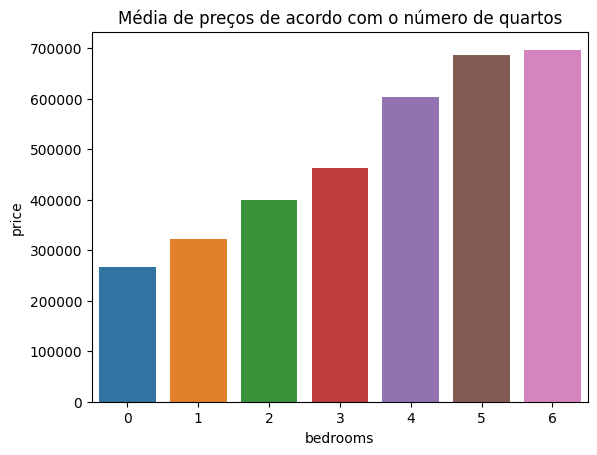

In [81]:
# Variação média de preços de acordo com o número de quartos
sns.barplot(data = df_clean.groupby('bedrooms',as_index=False).mean(),y='price',x='bedrooms') 
plt.title('Média de preços de acordo com o número de quartos')
plt.show()

### 5.4 Faixa de preço

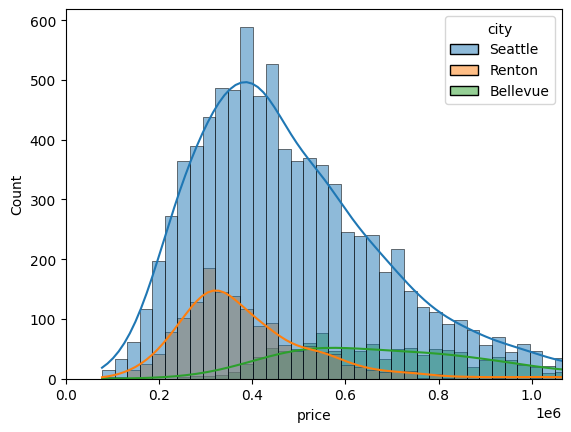

In [82]:
# Avaliando qual a faixa de preço mais comum dentre as 3 localidades com mais imóveis
df_city = df_clean[df_clean.city.isin(df_clean.city.value_counts()[:3].index)]
sns.histplot(data=df_city,x='price', hue='city',kde=True)
plt.xlim([0,df_city.price.median() + 2*df_city.price.std()])

plt.show()

In [83]:
df_city_group = df_city.groupby('city',as_index=False).agg({'price':['min','mean','median','max','std']})

df_city_group.columns = ['_'.join(col).strip() if col[1] != "" else col[0] for col in df_city_group.columns.values]
df_city_group

,city,price_min,price_mean,price_median,price_max,price_std
0,Bellevue,247500.00,802529.97,720000.00,2450000.00,370533.43
1,Renton,95000.00,393914.22,355500.00,2230000.00,166322.26
2,Seattle,78000.00,521926.73,452000.00,2453500.00,285937.33


### 5.5 Cidades com mas móveis

In [84]:
# 5 Cidades com mais imóveis a venda
df_clean.city.value_counts()[:5]

Seattle     8771
Renton      1550
Bellevue    1289
Kent        1182
Kirkland     953
Name: city, dtype: int64

## **6.0 Cálculos finais e conclusões**

### 6.1 Imóveis com mais lucros

In [85]:
# Escolher os 5 que tiveram mais lucro nas cidades de Seattle, Renton e Bellevue
df_sorted_agg = df_clean.groupby(['id','zipcode','city'],as_index=False).agg({'price':['min','mean','max'],
                                                        '$/ft2_living':'mean','profit': ['max','min']})

df_sorted_agg.columns = ['_'.join(col).strip() if col[1] != "" else col[0] for col in df_sorted_agg.columns.values]

df_sorted_agg.sort_values('profit_max',ascending=False, inplace = True)
df_sorted_agg.head()

,id,zipcode,city,price_min,price_mean,price_max,$/ft2_living_mean,profit_max,profit_min
0,1000102,98002,Auburn,300000.00,300000.00,300000.00,125.00,0,0
13872,6381500720,98125,Seattle,395000.00,395000.00,395000.00,176.34,0,0
13890,6384500581,98116,Seattle,555000.00,555000.00,555000.00,272.06,0,0
13889,6384500535,98116,Seattle,499000.00,499000.00,499000.00,392.91,0,0
13888,6384500035,98116,Seattle,370000.00,370000.00,370000.00,430.23,0,0


In [86]:
choice = df_sorted_agg[df_sorted_agg.city.isin(['Seattle', 'Renton' ,'Bellevue'])].head()
choice

,id,zipcode,city,price_min,price_mean,price_max,$/ft2_living_mean,profit_max,profit_min
13872,6381500720,98125,Seattle,395000.00,395000.00,395000.00,176.34,0,0
13890,6384500581,98116,Seattle,555000.00,555000.00,555000.00,272.06,0,0
13889,6384500535,98116,Seattle,499000.00,499000.00,499000.00,392.91,0,0
13888,6384500035,98116,Seattle,370000.00,370000.00,370000.00,430.23,0,0
13887,6384300020,98177,Seattle,494000.00,494000.00,494000.00,269.95,0,0


### 6.2 Imóveis com mais prejuízos

In [87]:
# 5 Piores escolhas - Pois tiveram prejuízo na venda
df_sorted_agg.sort_values('profit_min',ascending=True, inplace = True)
df_sorted_agg.head()

,id,zipcode,city,price_min,price_mean,price_max,$/ft2_living_mean,profit_max,profit_min
0,1000102,98002,Auburn,300000.00,300000.00,300000.00,125.00,0,0
4,3600057,98144,Seattle,402500.00,402500.00,402500.00,243.94,0,0
5,3600072,98144,Seattle,680000.00,680000.00,680000.00,306.31,0,0
6,3800008,98178,Seattle,178000.00,178000.00,178000.00,89.45,0,0
7,5200087,98108,Seattle,487000.00,487000.00,487000.00,191.73,0,0


### 6.3 Exportando o novo dataset (Final)

In [88]:
df_sorted_agg.to_csv('Dataset/kc_house_data_final.csv')

# Respondendo aos questionamentos

* A Questão de Negócio:
  - Qual a minha meta?
    > Possível resposta: Garantir um investimento de imóvel em King County que me retorne um lucro futuramente
  - Como posso chegar?
    > Possível resposta: Escolhendo 5 imóveis que tem maior chance de venda e com melhores lucros históricos 
* O Entendimento do Negócio:
  - Quais dados eu tenho disponível?
    > Possível resposta: São diversos atributos de imóveis que foram vendidos no Condado de King  de Maio de 2014 até 2015. Expressam dados gerais do imóvei como tamanho, quartos e preço de venda, porém tem dados de qualidade como beleza da vista e qualidade do material utilizado na construção. Também existe as variáveis de localização do imóvel. 
  - Eles são relevantes para o problema?
    > Possível resposta: Quase todos os atributos neste caso são relevantes, principalmente aqueles que podemos associar com preço de venda, como o número de quartos, área habitável e se é na beira da praia ou não. 
  - Eles me trazem uma solução direta?
    > Possível resposta: Eles me trazem diversas opções e noções, porém ainda não é possível escolher um imóvel que possamos afirmar que a chance dele dar um valor X de lucro seja alta. 
  - Qual o meu setor ou range de negócio?
    > Possível resposta: No geral, o meu setor de negócio são imóveis dentro do condado de King no Estado de Washington nos USA de 2014 a 2015. Para tomada de decisão, ainda filtrei a minha escolha às 3 cidades que possuem mais registros de venda nesse período, sendo elas: 'Seattle', 'Renton' ,'Bellevue'.
* A Coleta de Dados:
  - Os dados que eu tenho fazem sentido?
    > Possível resposta: Sim. Não existe nenhum valor ausente. Entretanto, existem atributos com interpretações subjetivas como por exemplo o `floor`, indicando quantos andares tem uma casa com valores decimais, como se fosse um sótão talvez.
  - Estão no formato que eu gostaria?
    > Possível resposta: Alguns dados precisaram ser formatados como no caso da Data.
  - O que mais eu consigo obter de informação destes dados?
    > Possível resposta: Alguns dos insights aplicados no problema foi o preço por área, cidade em que se localiza o imóvel e o lucro ou perda financeira baseado nas venda do imóvel durante o período. 
* A Limpeza de Dados:
- Data
    > Possível resposta: A data veio num formato diferente do usual, portanto foi feito uma tratativa para limpar os dados.
  - Remoção de dados outliers e valores ausentes
    > Possível resposta:  O dataset não apresentava valores ausentes. Já a situação de outliers, foi utilizado o percentil de 99,5% de algumas colunas para filtrar os dados finais.
* A Exploração de Dados:
  - Visualização dos dados
    > Possível resposta: É possível montar diversas visualizações de dados e análises, porém limitou-se a ver média de preço por área em cada cidade, a distribuição de preço das 3 cidades com mais imóveis.
  - Quais as minhas métricas essenciais
    > Possível resposta: Para a escolha dos melhores imóveis, foi considerado o lucro de venda do imóvel dentro de 1 anos e a cidade onde ele se encontra.
  - Baseado nos dados, qual imóvel ou tipo de imóveis eu deveria comprar.
    > Possível resposta: Utilizando essas métricas da etapa anterior, o ideal é escolher imóveis que apresentaram uma revenda ao longo do período.

